In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.txt')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


# Uni-variate Analysis

In [6]:
len(train['Item_Identifier'].value_counts(sort=False))

1559

1159 unique identifiers i.e products are there

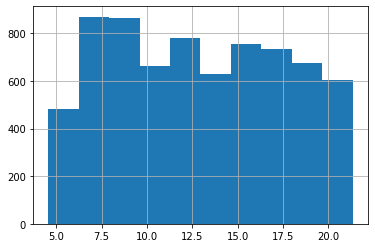

In [7]:
train['Item_Weight'].hist()

In [8]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train['Item_Fat_Content'].value_counts(sort=False)

Regular    2889
Low Fat    5089
low fat     112
LF          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [10]:
train['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)

In [11]:
train['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)

In [12]:
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


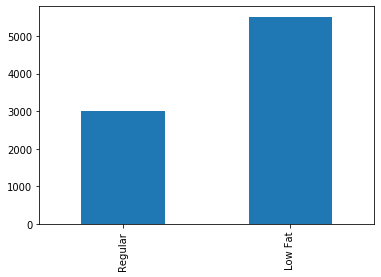

In [13]:
train['Item_Fat_Content'].value_counts(sort=False).plot('bar')

Slightly imbalanced, SMOTE is to be applied

In [14]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

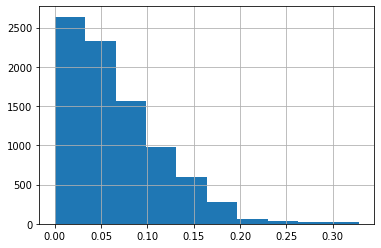

In [15]:
train['Item_Visibility'].hist()

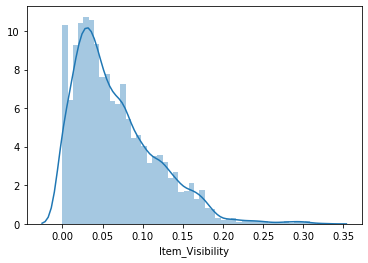

In [16]:
sns.distplot(train['Item_Visibility'])

Need to apply log transformation

In [17]:
train['Item_Visibility_treated'] = np.log(train['Item_Visibility'])

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_treated
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,-4.132215
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,-3.948780
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,-4.088756
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,-inf
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,-inf


Item visibility can't be 0(wrong information, replacing with nan)

In [19]:
train['Item_Visibility'].replace(0.0,np.nan,inplace=True)

In [20]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Visibility_treated         0
dtype: int64

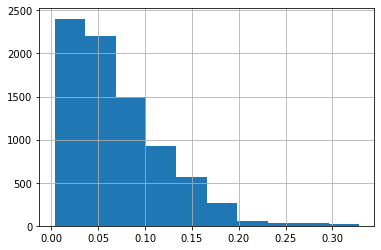

In [21]:
train['Item_Visibility'].hist()

In [22]:
train['Item_Visibility_treated'] = np.log(train['Item_Visibility'])

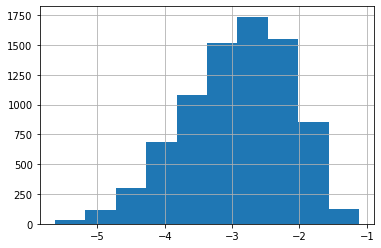

In [23]:
train['Item_Visibility_treated'].hist()

Need to normalize more later

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

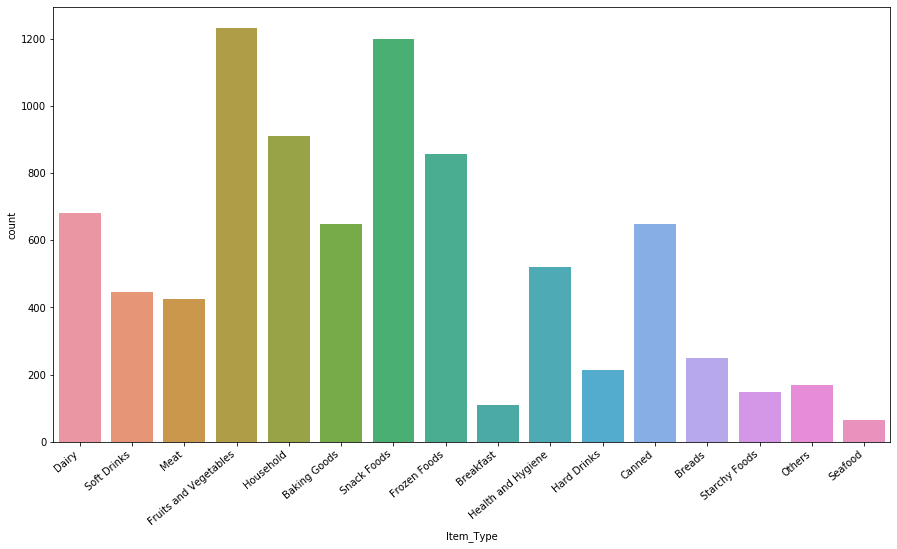

In [24]:
plt.figure(figsize=(15,8))
ax = sns.countplot(train['Item_Type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Need to check more abt this variable during bi-variate analysis

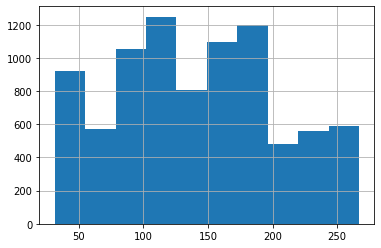

In [25]:
train['Item_MRP'].hist()

Maybe higher price is related to higher sales, need to check later

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Outlet Identifier')

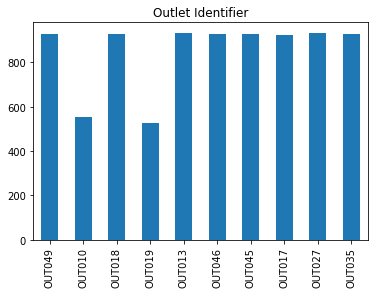

In [26]:
train['Outlet_Identifier'].value_counts(sort=False).plot('bar')
plt.title('Outlet Identifier')

Need to check more during bi-variate analysis

In [27]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_treated
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,-4.132215
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,-3.948780
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,-4.088756
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


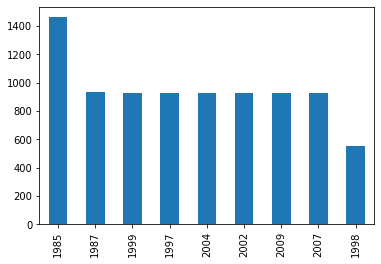

In [28]:
train['Outlet_Establishment_Year'].value_counts().plot('bar')

In [29]:
train['Outlet_Establishment_Year'].max()

2009

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


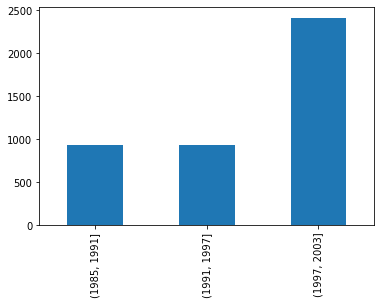

In [30]:
pd.cut(train['Outlet_Establishment_Year'],np.arange(1985,2009,6)).value_counts(sort=False).plot('bar')

older establishment may lead to higher sales, need to check

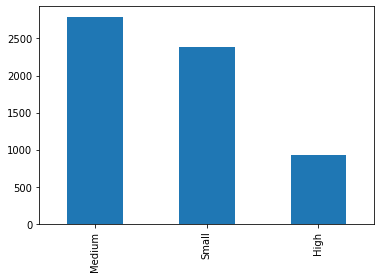

In [31]:
train['Outlet_Size'].value_counts(sort=False).plot(kind='bar')

check with sales in the next step

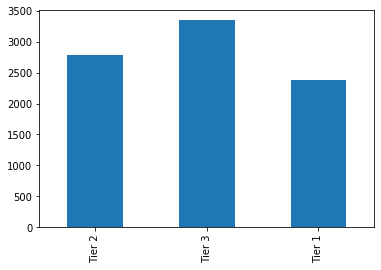

In [32]:
train['Outlet_Location_Type'].value_counts(sort=False).plot(kind='bar')

check with sales in the next step

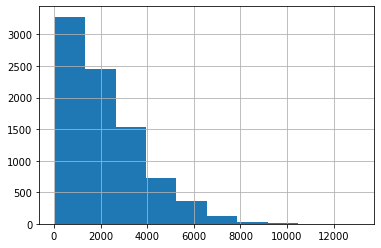

In [33]:
train['Item_Outlet_Sales'].hist()

In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_treated
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,-4.132215
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,-3.948780
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,-4.088756
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN


# Bi-Variate Analysis

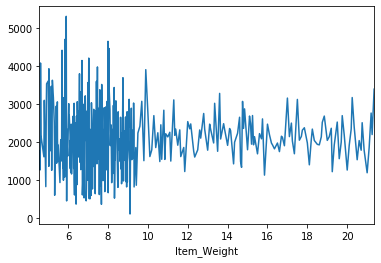

In [35]:
train.groupby('Item_Weight')['Item_Outlet_Sales'].agg('mean').plot()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


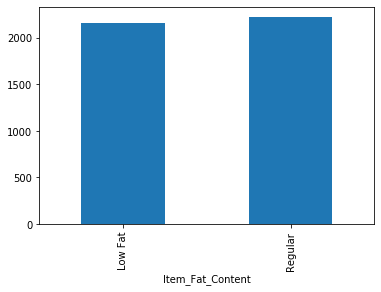

In [36]:
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot('bar')

It's clear that sales doesn't change by fat content

Text(0, 0.5, 'Item Outlet Sales')

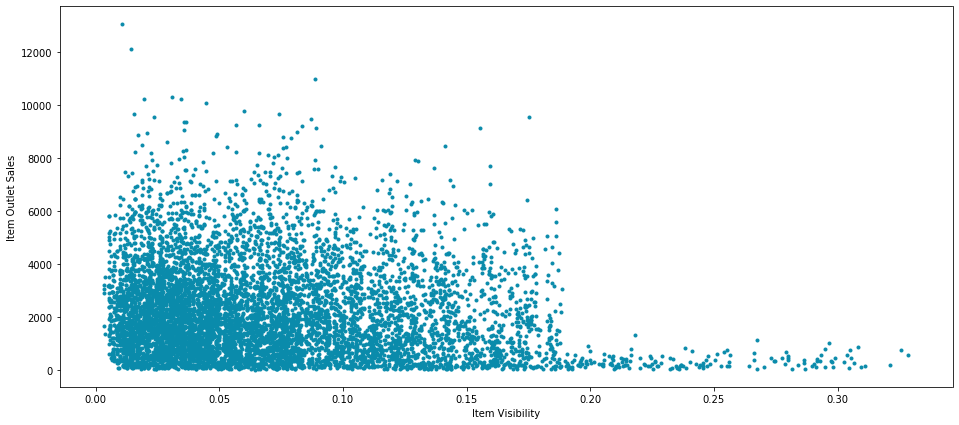

In [37]:
plt.figure(figsize=(16,7))
plt.scatter(train['Item_Visibility'],train['Item_Outlet_Sales'],marker='.',color='#0a8bab')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')

Strange...after .20 visibility sales seems to be decreasing...

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


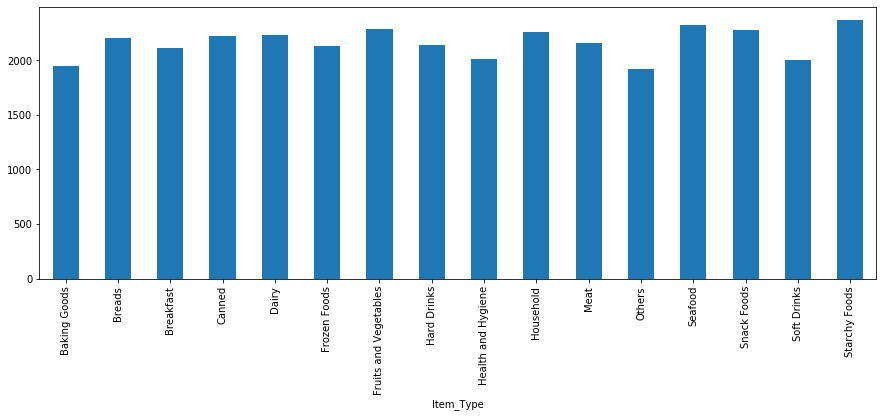

In [38]:
plt.figure(figsize=(15,5))
train.groupby('Item_Type')['Item_Outlet_Sales'].agg('mean').plot('bar')

Almost all sale the same with slight ups n downs

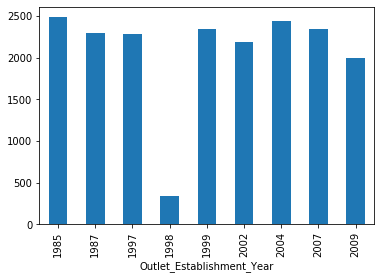

In [39]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].agg('mean').plot(kind='bar')

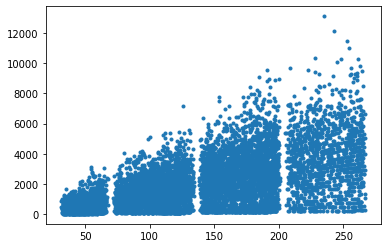

In [40]:
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'],marker='.')

Hypothesis confirmed...increase in mrp increases sales

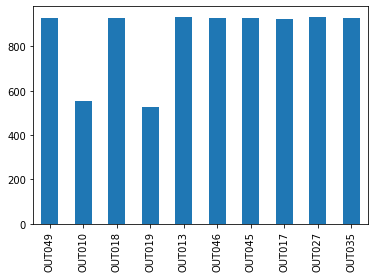

In [41]:
train['Outlet_Identifier'].value_counts(sort=False).plot(kind='bar')

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


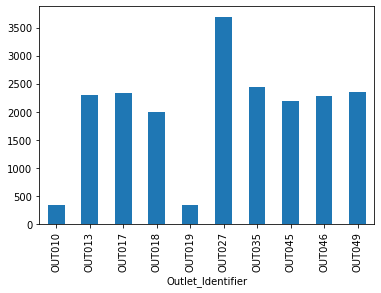

In [42]:
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg('mean').plot('bar')

Some outlets have very less sales

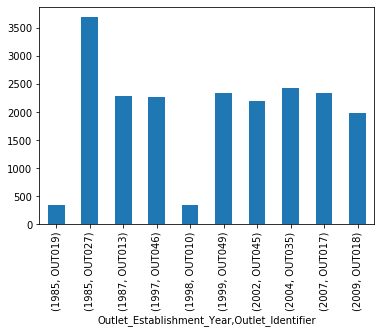

In [43]:
train.groupby(['Outlet_Establishment_Year','Outlet_Identifier'])['Item_Outlet_Sales'].agg('mean').plot(kind='bar')

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


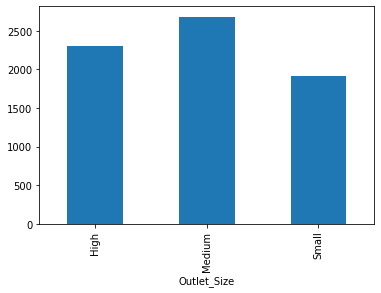

In [44]:
train.groupby('Outlet_Size')['Item_Outlet_Sales'].agg('mean').plot('bar')

In [45]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Visibility_treated       526
dtype: int64

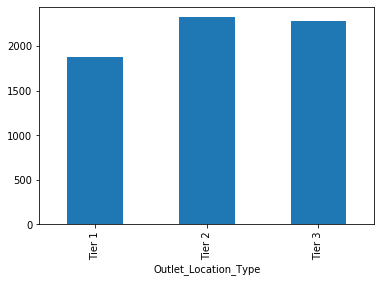

In [46]:
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].agg('mean').plot(kind='bar')

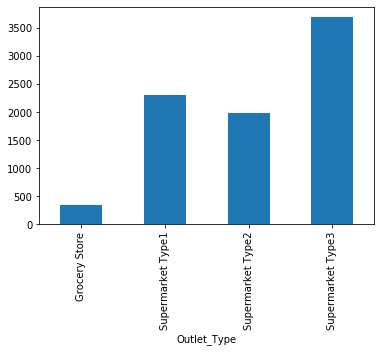

In [47]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].agg('mean').plot(kind='bar')

In [48]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_treated
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,-4.132215
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,-3.948780
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,-4.088756
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN


In [49]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Visibility_treated       526
dtype: int64

In [50]:
def percent_miss(df):
    for col in train.columns:
        print('Missing values in '+ str(col) +' is: '+ str(train[col].isna().sum()/train.shape[0])+'%')

In [51]:
percent_miss(train)

Missing values in Item_Identifier is: 0.0%
Missing values in Item_Weight is: 0.1716531737651062%
Missing values in Item_Fat_Content is: 0.0%
Missing values in Item_Visibility is: 0.0617153584418632%
Missing values in Item_Type is: 0.0%
Missing values in Item_MRP is: 0.0%
Missing values in Outlet_Identifier is: 0.0%
Missing values in Outlet_Establishment_Year is: 0.0%
Missing values in Outlet_Size is: 0.2827642848762173%
Missing values in Outlet_Location_Type is: 0.0%
Missing values in Outlet_Type is: 0.0%
Missing values in Item_Outlet_Sales is: 0.0%
Missing values in Item_Visibility_treated is: 0.0617153584418632%


# PREPROCESSING

# Item weight missing values filled using corresponding item identifier item weights, using groupby function

In [52]:
train_processed = train.copy()

In [53]:
train_processed['Item_Weight'].fillna(train_processed.groupby('Item_Identifier')['Item_Weight'].transform('mean'),inplace=True)

In [54]:
train_processed['Item_Weight'].fillna(train_processed['Item_Weight'].mean(),inplace=True)

In [55]:
train_processed.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Visibility_treated       526
dtype: int64

# Missing Values in Item visibility also treated in the same way

In [56]:
train_processed['Item_Visibility'].fillna(train_processed.groupby('Item_Identifier')['Item_Visibility'].transform('mean'),inplace=True)

In [57]:
train_processed.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Visibility_treated       526
dtype: int64

# Missing values in Outlet size are filled with the mode of corresponding outlet type values

In [58]:
train_processed.set_index('Outlet_Type',inplace=True)

In [59]:
train_processed['Outlet_Size'].fillna(train_processed.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.value_counts().index[0]),inplace=True)

In [60]:
train_processed.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.value_counts().index[0])

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [61]:
train_processed.isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Item_Outlet_Sales              0
Item_Visibility_treated      526
dtype: int64

In [62]:
train_processed.Item_Visibility_treated.fillna(train_processed.groupby('Item_Identifier')['Item_Visibility_treated'].transform('mean'),inplace=True)

In [63]:
train_processed.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Item_Outlet_Sales            0
Item_Visibility_treated      0
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
fat_le = LabelEncoder()

In [66]:
train_processed['Item_Fat_Content'] = fat_le.fit_transform(train_processed['Item_Fat_Content'])

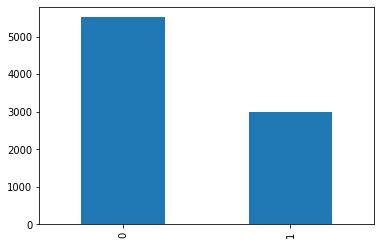

In [67]:
train_processed.Item_Fat_Content.value_counts(sort=False).plot(kind='bar')

In [68]:
Item_Type_le = LabelEncoder()

In [69]:
train_processed.Item_Type = Item_Type_le.fit_transform(train_processed.Item_Type)

In [70]:
train_processed.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated
Outlet_Type,,,,,,,,,,,,
Supermarket Type1,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,-4.132215
Supermarket Type2,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,443.4228,-3.948780
Supermarket Type1,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,2097.2700,-4.088756
Grocery Store,FDX07,19.20,1,0.022911,6,182.0950,OUT010,1998,Small,Tier 3,732.3800,-3.776163
Supermarket Type1,NCD19,8.93,0,0.016164,9,53.8614,OUT013,1987,High,Tier 3,994.7052,-4.155523


In [71]:
train_processed.reset_index(inplace=True)

In [72]:
train_processed.head()

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated
0,Supermarket Type1,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,-4.132215
1,Supermarket Type2,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,443.4228,-3.948780
2,Supermarket Type1,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,2097.2700,-4.088756
3,Grocery Store,FDX07,19.20,1,0.022911,6,182.0950,OUT010,1998,Small,Tier 3,732.3800,-3.776163
4,Supermarket Type1,NCD19,8.93,0,0.016164,9,53.8614,OUT013,1987,High,Tier 3,994.7052,-4.155523


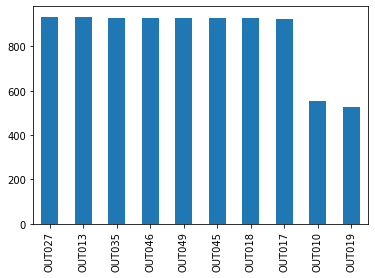

In [73]:
train_processed.Outlet_Identifier.value_counts().plot(kind='bar')

In [74]:
Outlet_Identifier_le = LabelEncoder()

In [75]:
train_processed.Outlet_Identifier = Outlet_Identifier_le.fit_transform(train_processed.Outlet_Identifier)

In [76]:
train_processed.head()

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated
0,Supermarket Type1,FDA15,9.30,0,0.016047,4,249.8092,9,1999,Medium,Tier 1,3735.1380,-4.132215
1,Supermarket Type2,DRC01,5.92,1,0.019278,14,48.2692,3,2009,Medium,Tier 3,443.4228,-3.948780
2,Supermarket Type1,FDN15,17.50,0,0.016760,10,141.6180,9,1999,Medium,Tier 1,2097.2700,-4.088756
3,Grocery Store,FDX07,19.20,1,0.022911,6,182.0950,0,1998,Small,Tier 3,732.3800,-3.776163
4,Supermarket Type1,NCD19,8.93,0,0.016164,9,53.8614,1,1987,High,Tier 3,994.7052,-4.155523


In [77]:
Outlet_size_le = LabelEncoder()

train_processed.Outlet_Size = Outlet_size_le.fit_transform(train_processed.Outlet_Size)

train_processed.head()

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated
0,Supermarket Type1,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,Tier 1,3735.1380,-4.132215
1,Supermarket Type2,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,Tier 3,443.4228,-3.948780
2,Supermarket Type1,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,Tier 1,2097.2700,-4.088756
3,Grocery Store,FDX07,19.20,1,0.022911,6,182.0950,0,1998,2,Tier 3,732.3800,-3.776163
4,Supermarket Type1,NCD19,8.93,0,0.016164,9,53.8614,1,1987,0,Tier 3,994.7052,-4.155523


In [78]:
Outlet_Location_Type_le = LabelEncoder()

train_processed.Outlet_Location_Type = Outlet_Location_Type_le.fit_transform(train_processed.Outlet_Location_Type)

train_processed.head()

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated
0,Supermarket Type1,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,3735.1380,-4.132215
1,Supermarket Type2,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,443.4228,-3.948780
2,Supermarket Type1,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,2097.2700,-4.088756
3,Grocery Store,FDX07,19.20,1,0.022911,6,182.0950,0,1998,2,2,732.3800,-3.776163
4,Supermarket Type1,NCD19,8.93,0,0.016164,9,53.8614,1,1987,0,2,994.7052,-4.155523


In [79]:
Outlet_Type_le = LabelEncoder()

train_processed.Outlet_Type = Outlet_Type_le.fit_transform(train_processed.Outlet_Type)

train_processed.head()

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated
0,1,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,3735.1380,-4.132215
1,2,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,443.4228,-3.948780
2,1,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,2097.2700,-4.088756
3,0,FDX07,19.20,1,0.022911,6,182.0950,0,1998,2,2,732.3800,-3.776163
4,1,NCD19,8.93,0,0.016164,9,53.8614,1,1987,0,2,994.7052,-4.155523


In [80]:
Item_Identifier_le = LabelEncoder()

train_processed.Item_Identifier = Item_Identifier_le.fit_transform(train_processed.Item_Identifier)

train_processed.head()

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated
0,1,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,3735.1380,-4.132215
1,2,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,443.4228,-3.948780
2,1,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,2097.2700,-4.088756
3,0,1121,19.20,1,0.022911,6,182.0950,0,1998,2,2,732.3800,-3.776163
4,1,1297,8.93,0,0.016164,9,53.8614,1,1987,0,2,994.7052,-4.155523


# CORRELATION ANALYSIS

In [81]:
corr = train_processed.corr()

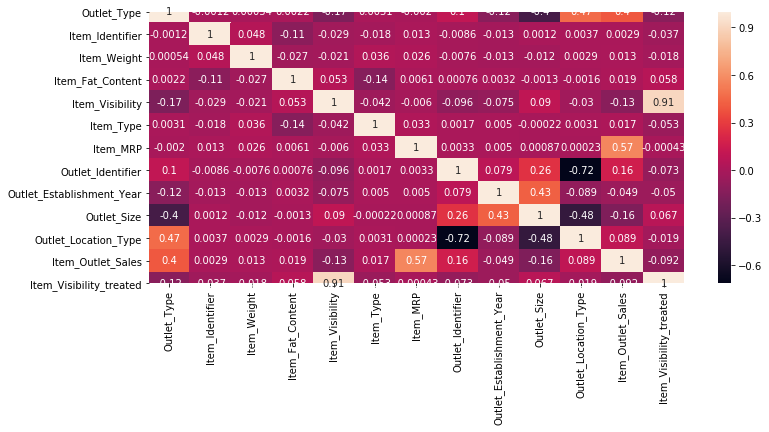

In [82]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)

# BASE MODEL CREATION

In [83]:
X1 = train_processed.drop(['Item_Outlet_Sales','Item_Identifier','Item_Visibility'],axis=1)
y1 = train_processed['Item_Outlet_Sales']

In [84]:
X1=np.array(X1)
y1=np.array(y1)

In [85]:
X1 = X1[:, None]

In [86]:
y1 = y1[:, None]

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,random_state=42)

In [89]:
nsamples, nx, ny = X_train1.shape
X_train1 = X_train1.reshape((nsamples,nx*ny))

In [90]:
nsamples, nx, ny = X_test1.shape
X_test1 = X_test1.reshape((nsamples,nx*ny))

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
dt = DecisionTreeRegressor(max_depth=6)

In [93]:
dt.fit(X_train1,y_train1)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [94]:
dt.score(X_test1,y_test1)

0.5818390362984704

Performance increased by changing max_depth in decisiontree regressor

# Model 2

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lr = LinearRegression()

In [97]:
lr.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
lr.score(X_test1,y_test1)

0.503497475954223

# MODEL 3

In [99]:
from xgboost import XGBRegressor

In [100]:
xgb = XGBRegressor(learning_rate=0.05)

In [101]:
xgb.fit(X_train1,y_train1)

[11:01:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [102]:
xgb.score(X_test1,y_test1)

0.6042270412130601

# MODEL 4

In [103]:
from sklearn.linear_model import Ridge

In [104]:
ridge = Ridge()

In [105]:
ridge.fit(X_train1, y_train1)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
ridge.score(X_test1,y_test1)

0.5034945455790043

Performance did not improve

# MODEL 5

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

In [108]:
gbr = GradientBoostingRegressor(learning_rate=0.05)

In [109]:
gbr.fit(X_train1, y_train1)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [110]:
gbr.score(X_test1,y_test1)

0.6030214010021753

# BEST PERFORMANCE TILL NOW --- 60

# FEATURE ENGINEERING

In [111]:
train_processed.head()

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated
0,1,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,3735.1380,-4.132215
1,2,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,443.4228,-3.948780
2,1,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,2097.2700,-4.088756
3,0,1121,19.20,1,0.022911,6,182.0950,0,1998,2,2,732.3800,-3.776163
4,1,1297,8.93,0,0.016164,9,53.8614,1,1987,0,2,994.7052,-4.155523


In [112]:
train_processed.dtypes

Outlet_Type                    int32
Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Item_Outlet_Sales            float64
Item_Visibility_treated      float64
dtype: object

In [113]:
train_processed['Outlet_age'] = 2019-train_processed['Outlet_Establishment_Year']

In [114]:
train_processed.head()

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated,Outlet_age
0,1,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,3735.1380,-4.132215,20
1,2,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,443.4228,-3.948780,10
2,1,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,2097.2700,-4.088756,20
3,0,1121,19.20,1,0.022911,6,182.0950,0,1998,2,2,732.3800,-3.776163,21
4,1,1297,8.93,0,0.016164,9,53.8614,1,1987,0,2,994.7052,-4.155523,32


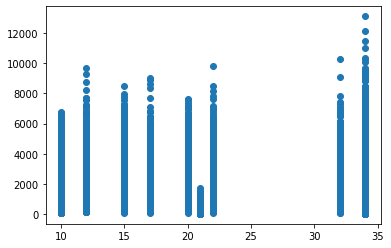

In [115]:
plt.scatter(train_processed.Outlet_age,train_processed.Item_Outlet_Sales)

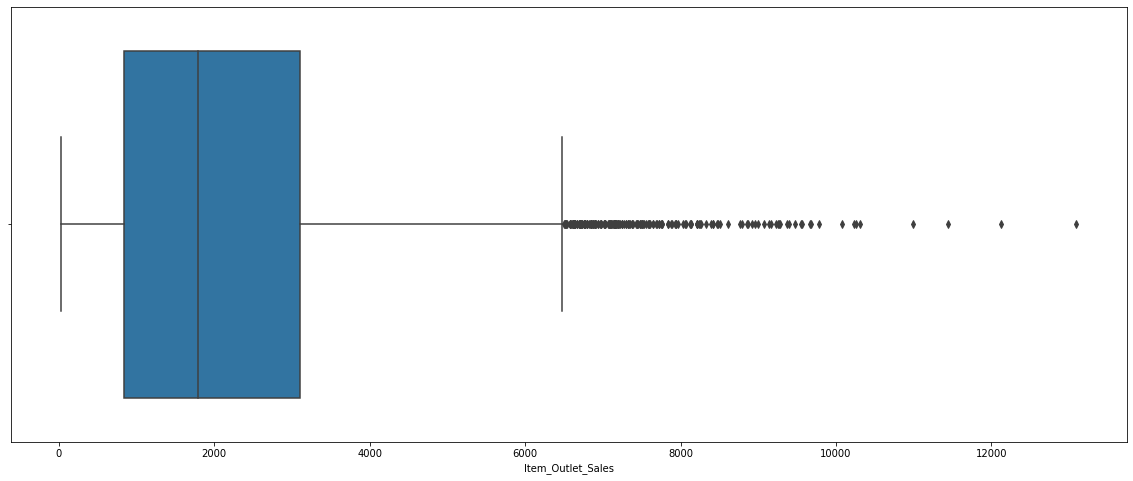

In [116]:
plt.figure(figsize=(20,8))
sns.boxplot(train_processed.Item_Outlet_Sales)

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

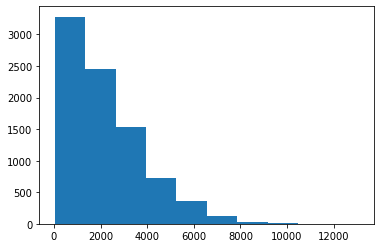

In [117]:
plt.hist(train_processed.Item_Outlet_Sales)

In [118]:
train_processed['outlet_sales_log'] = np.log(train_processed.Item_Outlet_Sales)

(array([  53.,   99.,  326.,  429.,  784., 1251., 2051., 2276., 1156.,
          98.]),
 array([3.50525705, 4.10266854, 4.70008003, 5.29749152, 5.89490302,
        6.49231451, 7.089726  , 7.68713749, 8.28454898, 8.88196047,
        9.47937196]),
 <a list of 10 Patch objects>)

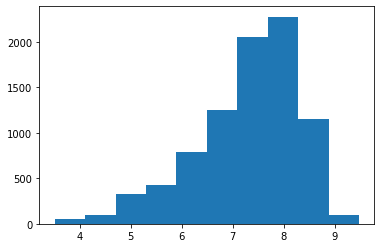

In [119]:
plt.hist(train_processed['outlet_sales_log'])

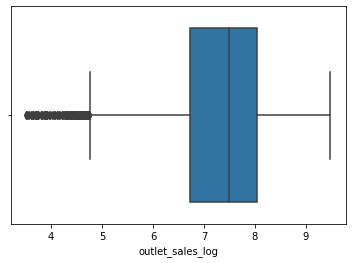

In [120]:
sns.boxplot(train_processed['outlet_sales_log'])

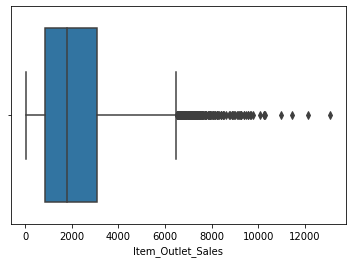

In [121]:
sns.boxplot(train_processed['Item_Outlet_Sales'])

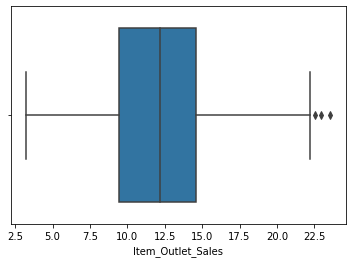

In [122]:
sns.boxplot(np.cbrt(train_processed['Item_Outlet_Sales']))

In [123]:
train_processed['sales_transformed'] = np.cbrt(train_processed['Item_Outlet_Sales'])

In [124]:
train_processed.head()

,Outlet_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Visibility_treated,Outlet_age,outlet_sales_log,sales_transformed
0,1,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,3735.1380,-4.132215,20,8.225540,15.515611
1,2,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,443.4228,-3.948780,10,6.094524,7.625576
2,1,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,2097.2700,-4.088756,20,7.648392,12.800240
3,0,1121,19.20,1,0.022911,6,182.0950,0,1998,2,2,732.3800,-3.776163,21,6.596300,9.013888
4,1,1297,8.93,0,0.016164,9,53.8614,1,1987,0,2,994.7052,-4.155523,32,6.902446,9.982319


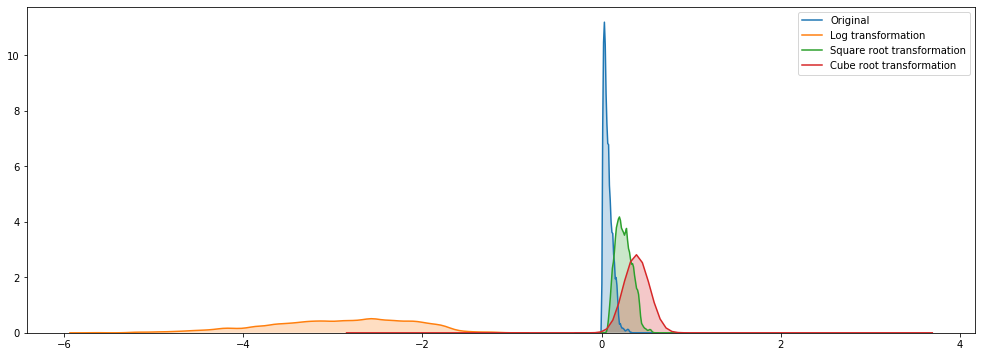

In [125]:
plt.figure(figsize=(17,6))
sns.kdeplot((train_processed['Item_Visibility']),shade=True,label='Original',bw=0.1)
sns.kdeplot(np.log(train_processed['Item_Visibility']),shade=True,label='Log transformation',bw=0.1)
sns.kdeplot(np.sqrt(train_processed['Item_Visibility']),shade=True,label='Square root transformation',bw=0.1)
sns.kdeplot(np.cbrt(train_processed['Item_Visibility']),shade=True,label='Cube root transformation',bw=1)

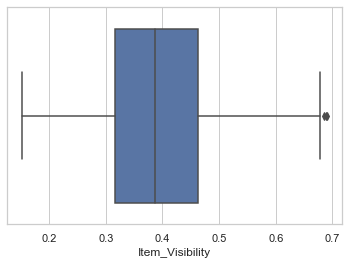

In [129]:
sns.set(style="whitegrid")
sns.boxplot(np.cbrt(train_processed['Item_Visibility']))
#sns.boxplot(np.sqrt(train_processed['Item_Visibility']),color='g',palette="Set3")